In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv(r"C:\Users\kunug\Downloads\Wholesale customers data (1).csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [25]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [27]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [29]:
df.duplicated

<bound method DataFrame.duplicated of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          17

In [31]:
df.shape

(440, 8)

In [33]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X = stscaler.fit_transform(df)

In [65]:
import scipy.cluster.hierarchy as sch

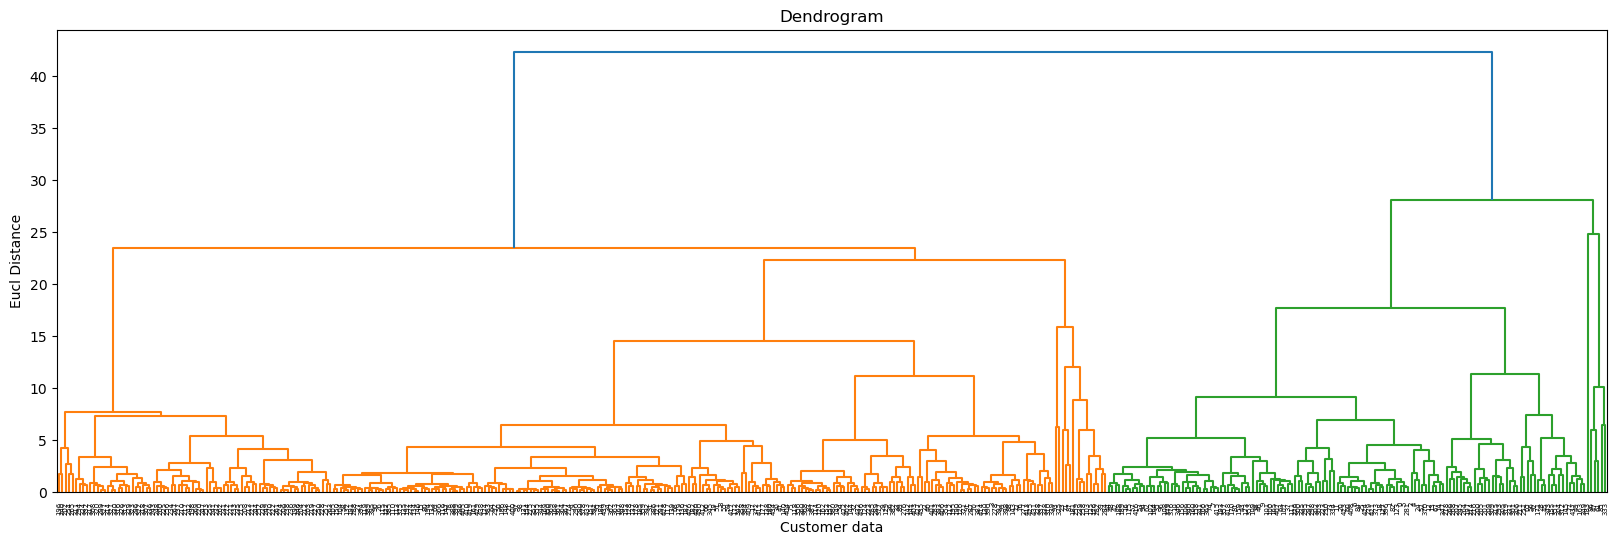

In [67]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel("Customer data")
plt.ylabel('Eucl Distance')
plt.show()

In [69]:
len(set(dendo['color_list']))

3

In [71]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
group = AgglomerativeClustering(n_clusters=3)
cluster=group.fit_predict(X)

In [75]:
cluster

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [45]:
type(cluster)

numpy.ndarray

In [47]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,2
...,...
435,1
436,1
437,2
438,1


In [49]:
pd.concat([df,group_num],axis=1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,1


In [51]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [53]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.3600234023958461

In [81]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [83]:
wcss

[2600.375648222442,
 2149.283956221759,
 1851.8408722743848,
 1567.4493550056052,
 1446.4349586356461,
 1189.4373315150992,
 1146.3938222781737,
 1082.6398816370165,
 969.1934595642861]

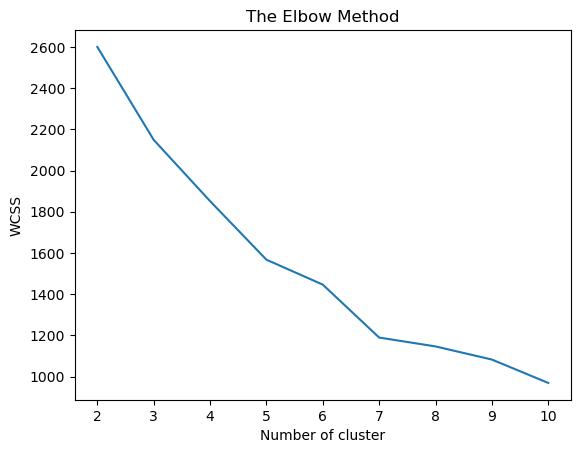

In [89]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()